<a href="https://colab.research.google.com/github/RafaelSdeSouza/astrostats-2025/blob/main/shap_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install transformers
#!pip install datasets
#!pip install shap

In [ ]:
import transformers
import shap
import numpy as np

In [ ]:
# Create the sentiment analysis pipeline
classifier = transformers.pipeline('sentiment-analysis', return_all_scores=True)

# List of texts for sentiment analysis
text_data = [
    "I absolutely loved the latest episode of the Star Trek! The characters were hilarious and the plot was unexpected.",
    "I hope the Professor of this module can make better jokes next time.",
    "The customer service at this store is terrible. I had a very unpleasant experience.",
    "I feel so peaceful when I'm out in nature. It's a wonderful escape from the hustle and bustle of the city.",
    "I can't stand the heat in summer. It's simply unbearable for me.",
    "The presentation was intriguing and insightful. I learned a lot of new things."
]

# Apply the sentiment analysis classifier to each text in the list
results = classifier(text_data)

# Print the results
for text, result in zip(text_data, results):
    print(f"Text: {text}\nSentiment: {result}\n")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Text: I absolutely loved the latest episode of the Star Trek! The characters were hilarious and the plot was unexpected.
Sentiment: [{'label': 'NEGATIVE', 'score': 0.00012459512799978256}, {'label': 'POSITIVE', 'score': 0.9998754262924194}]

Text: I hope the Professor of this module can make better jokes next time.
Sentiment: [{'label': 'NEGATIVE', 'score': 0.9990652203559875}, {'label': 'POSITIVE', 'score': 0.0009347648592665792}]

Text: The customer service at this store is terrible. I had a very unpleasant experience.
Sentiment: [{'label': 'NEGATIVE', 'score': 0.9997150301933289}, {'label': 'POSITIVE', 'score': 0.0002849601733032614}]

Text: I feel so peaceful when I'm out in nature. It's a wonderful escape from the hustle and bustle of the city.
Sentiment: [{'label': 'NEGATIVE', 'score': 0.00011654989066300914}, {'label': 'POSITIVE', 'score': 0.9998834133148193}]

Text: I can't stand the heat in summer. It's simply unbearable for me.
Sentiment: [{'label': 'NEGATIVE', 'score': 0.998

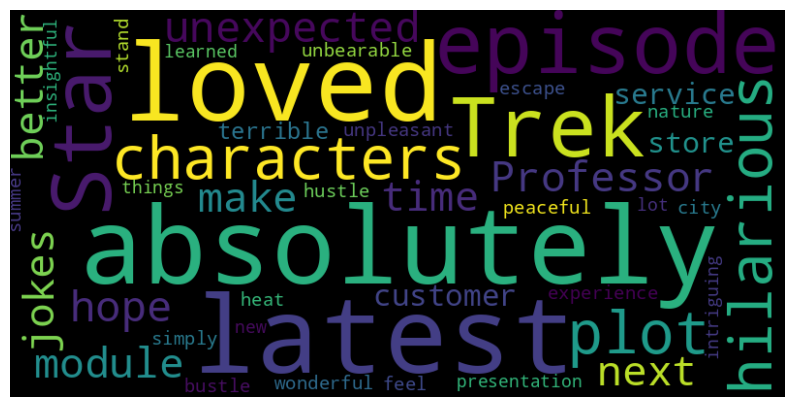

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Combine all sentences into one string
combined_text = " ".join(text_data)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(combined_text)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# define the explainer
explainer = shap.Explainer(classifier)

In [ ]:
# explain the predictions of the pipeline on the first two samples
shap_values = explainer(text_data)

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  17%|█▋        | 1/6 [00:00<?, ?it/s]

  0%|          | 0/240 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 3/6 [00:40<00:20,  6.72s/it]

  0%|          | 0/306 [00:00<?, ?it/s]

Partition explainer:  67%|██████▋   | 4/6 [00:56<00:21, 10.52s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  83%|████████▎ | 5/6 [01:28<00:18, 18.56s/it]

  0%|          | 0/380 [00:00<?, ?it/s]

Partition explainer: 100%|██████████| 6/6 [01:50<00:00, 19.73s/it]

  0%|          | 0/306 [00:00<?, ?it/s]

Partition explainer: 7it [02:06, 21.12s/it]


In [ ]:
shap.plots.text(shap_values[:,:,"POSITIVE"])

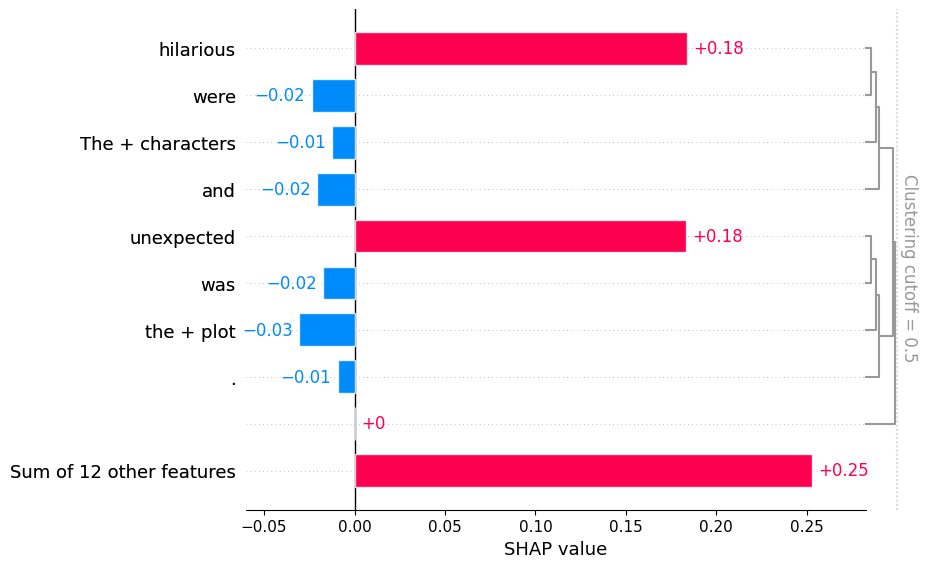

In [ ]:
shap.plots.bar(shap_values[0,:,"POSITIVE"])